## BINARY CLASSIFICATION LR

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\MACHINE LEARNING CODE\insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


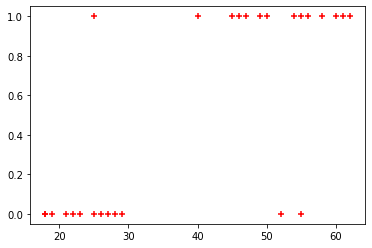

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)
X_test

,age
26,23
24,50
1,25


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model=LogisticRegression()

In [11]:
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
model.predict(X_test)

array([0, 1, 0], dtype=int64)

In [13]:
model.score(X_test,y_test)

1.0

In [15]:
model.predict_proba(X_test)

array([[0.87399676, 0.12600324],
       [0.19484718, 0.80515282],
       [0.84398824, 0.15601176]])

In [17]:
model.predict([[21]])

array([0], dtype=int64)

## MULTI-CLASSIFICATION  LR

In [18]:
from sklearn.datasets import load_digits

In [19]:
digits= load_digits()

In [20]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

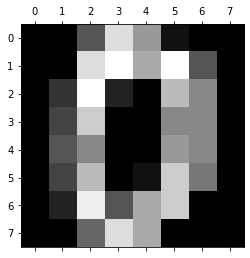

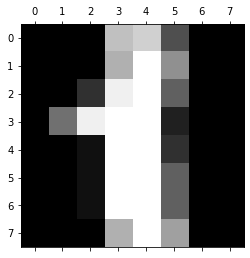

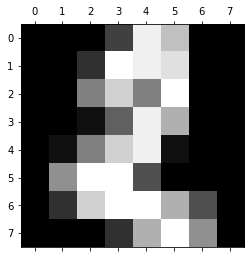

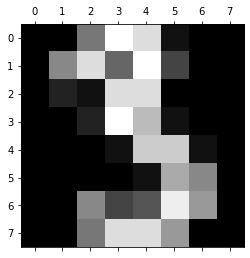

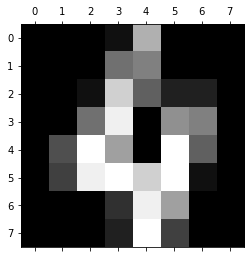

In [25]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [27]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target)

In [32]:
len(x_train)

1347

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.score(x_test,y_test)

0.9622222222222222

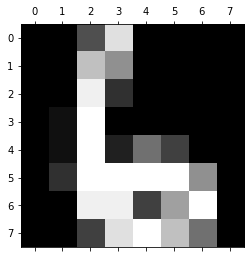

In [38]:
plt.matshow(digits.images[67])

In [39]:
digits.target[67]

6

In [40]:
model.predict([digits.data[67]])

array([6])

In [42]:
y_predict=model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predict)
cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  2,  2,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 40,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 54,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

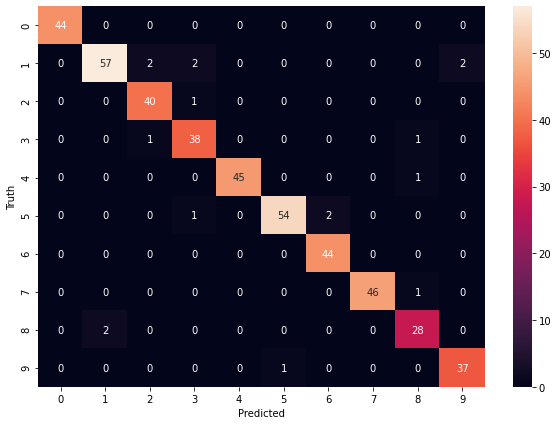

In [43]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import joblib
joblib.dump(model,'_model.pkl')